In [1]:
import yaml
import numpy as np
import csv
import glob
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn

ModuleNotFoundError: No module named 'seaborn'

### Read CSV

In [ ]:
csv_file_names=glob.glob("/flush5/sou090/01 - Project/annotations/*")

### Creatioin of CSV

In [3]:
#Head of the new csv
head = {'text' : [], 'value' : []}
output = pd.DataFrame(head)

### Read each line of each data frame

In [4]:
name_indice=5
text_indice=6
value_indice=[2,4,5,1,3,5,4,6,6,0]
name_list=['First Party Collection/Use','Third Party Sharing/Collection','User Choice/Control','User Access, Edit and Deletion','Data Retention','Data Security','Policy Change','Do Not Track','International and Specific Audiences', 'Other']

In [5]:
u=0
for i in tqdm(range (len(csv_file_names))):
    df=pd.read_csv(csv_file_names[i], header=None)
    for j in range (len(df)):
        for k in range (len(name_list)):
            #Association of the value wih  the value_indice
            if df[name_indice][j]==name_list[k]:
                text=df[text_indice][j]
                value=value_indice[k]
                output.loc[u]=[text, value]
                u=u+1

100%|██████████| 115/115 [01:14<00:00,  1.54it/s]


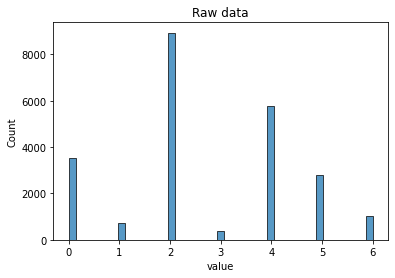

In [6]:
fig_1=seaborn.histplot(output,x='value').set(title="Raw data")
plt.savefig('fig_1')

## Order the data

The text is raw from the data pricavcy. In a line , there is multiple "selected_text".


1. We need to cut sentences par sentences for the model. 
We will give the same value for each "selected_text".
2. Delate the duplicate rows
3. Drop when the sentences is sorther than 10 caracters

#### 1. We need to cut sentences par sentences for the model. 

In [7]:
#Function to cut each "selected text"
def find_text(L):
    lis=[]
    R=''
    L_bis=L
    a=L.find("selectedText")
    while a!=-1:
        i=a+16
        c=0
        k=i
        while L[k]!='"':
            c=c+1
            k=k+1
        R=L[i:i+c]
        lis.append(R)
        L_bis=L[i:]
        a=L_bis.find("selectedText")
        L=L_bis
    return(lis)

In [8]:
#previous data
df=output
#new data
output_2= pd.DataFrame(head)

In [9]:
output

,text,value
0,"{""Other Type"": {""selectedText"": ""RedOrbit, Inc...",0.0
1,"{""Other Type"": {""selectedText"": ""This privacy ...",0.0
2,"{""Other Type"": {""selectedText"": ""RedOrbit, Inc...",0.0
3,"{""Collection Mode"": {""selectedText"": ""Not sele...",2.0
4,"{""Collection Mode"": {""selectedText"": ""null"", ""...",2.0
...,...,...
23189,"{""Other Type"": {""endIndexInSegment"": 220, ""sta...",0.0
23190,"{""Other Type"": {""endIndexInSegment"": 220, ""sta...",0.0
23191,"{""Other Type"": {""endIndexInSegment"": 190, ""sta...",0.0
23192,"{""Other Type"": {""endIndexInSegment"": 151, ""sta...",0.0


In [10]:
c=0
for j in tqdm(range (len(df))):
    lit=find_text(df['text'][j])
    for k in range (len(lit)):
        text=lit[k]
        value=df['value'][j]
        output_2.loc[c]=[text, value]
        c=c+1

100%|██████████| 23194/23194 [07:19<00:00, 52.73it/s] 


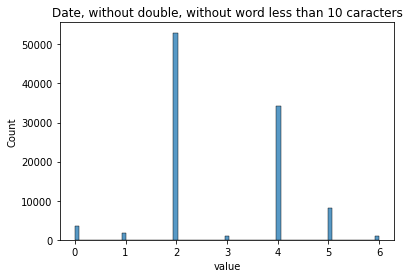

In [11]:
fig_2=seaborn.histplot(output_2,x='value').set(title="Date, without double, without word less than 10 caracters")
plt.savefig('fi_2')

#### 2. Delate the double

In [12]:
df=output_2

In [13]:
#count the ducplicate rows
df.duplicated().value_counts()

True     69291
False    33396
dtype: int64

In [14]:
df=df.drop_duplicates(ignore_index=True)

#### 3. Delate words less than 10 caracters and value null

In [15]:
output_3= pd.DataFrame(head)

In [16]:
c=0
for k in tqdm(range(len(df['text']))):
    if len(df['text'][k])>10:
        text=df['text'][k]
        value=df['value'][k]
        output_3.loc[c]=[text, value]
        c=c+1

100%|██████████| 33396/33396 [01:29<00:00, 371.09it/s]


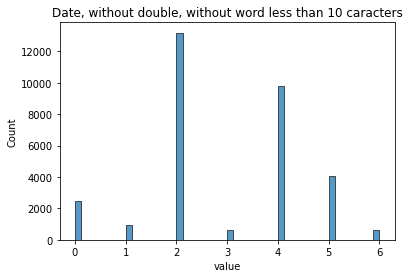

In [17]:
fig_3=seaborn.histplot(output_3,x='value').set(title="Date, without double, without word less than 10 caracters")
plt.savefig('fig_3')

## Minimum of value for same text
Some rows of the data have the same text buta different value. We will keep the strongest value of a same text : the minimum.

In [18]:
#previous data
df=output_3
#new data
output_4= pd.DataFrame(head)

In [19]:
df=df.sort_values('text', ignore_index=True)

In [20]:
df

,text,value
0,"(1) a Federal, State, or local law enforcement...",4.0
1,"(1) a Federal, State, or local law enforcement...",4.0
2,(1) announcing the change on the home page of ...,4.0
3,(1) comply with the law or legal processes;,4.0
4,(1) comply with the law or with legal process;,4.0
...,...,...
31670,ypically used to quickly identify a user's com...,5.0
31671,zip code and state,2.0
31672,"zip code, age, income",2.0
31673,zip code/postal code.,2.0


In [21]:
for k in tqdm(range(len(df))):
    if k+1<len(df):
        if df['text'][k]!=df['text'][k+1]:
            text=df['text'][k]
            value=df['value'][k]
            output_4.loc[k]=[text,value]
            

100%|██████████| 31675/31675 [01:26<00:00, 367.20it/s]


In [22]:
output_4

,text,value
0,"(1) a Federal, State, or local law enforcement...",4.0
1,"(1) a Federal, State, or local law enforcement...",4.0
2,(1) announcing the change on the home page of ...,4.0
3,(1) comply with the law or legal processes;,4.0
4,(1) comply with the law or with legal process;,4.0
...,...,...
31669,ypes of targeted advertising by visiting the D...,2.0
31670,ypically used to quickly identify a user's com...,5.0
31671,zip code and state,2.0
31672,"zip code, age, income",2.0


In [23]:
output_4.to_csv('/flush5/sou090/01 - Project/c-10/data_c_10.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/flush5/sou090/project6/data_convert/data_c_10.csv'

In [ ]:
fig_4=seaborn.histplot(output_4,x='value').set(title="Date, without double, without word less than 10 caracters, without same sentences different value")
plt.savefig('fig_4')